In [1]:
from PIL import Image
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import jieba
import numpy as np
from collections import Counter

Building prefix dict from C:\Users\K410\Desktop\ex11-wordcloud\prg\dict.txt.big.txt ...
Loading model from cache C:\Users\K410\AppData\Local\Temp\jieba.uac6c00cac3cf2097e77e4bf082c9b638.cache
Loading model cost 1.064 seconds.
Prefix dict has been built succesfully.


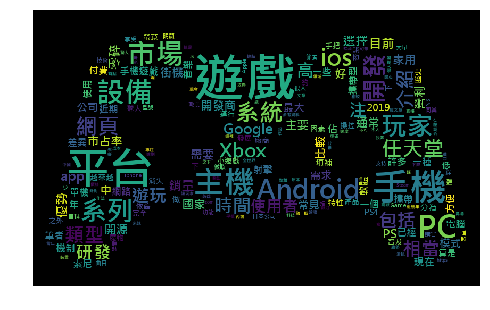

In [2]:
text = open('prg/news.txt', "r",encoding="utf-8").read() #讀文字資料

jieba.set_dictionary('prg/dict.txt.big.txt')
with open('prg/stopword.txt', "r", encoding='utf-8-sig') as f: #設定停用慈
    stops = f.read().split('\n')
terms = [] #儲存字詞
for t in jieba.cut(text, cut_all=False): #拆解句子為字詞
    if t not in stops:
        terms.append(t)
diction = Counter(terms)
#可列印詞的統計數量
#print(diction)

font = "prg\\msjhbd.ttc" #設定字型(粗黑)
#wordcloud = WordColud(font_path=".......")

mask = np.array(Image.open("prg/Controller.png")) #設定文字雲形狀
#wordcloud = wordcloud(font_path=font)
wordcloud = WordCloud(background_color="black",mask=mask, font_path=font) #背景顏色預設為黑色，改為白色
wordcloud.generate_from_frequencies(diction) #產生文字雲

#產生圖片
plt.figure(figsize=(8,6))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

wordcloud.to_file("NewsWordcloud.png") #存檔